In [530]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
import sqlalchemy 
import datetime as dt
from pandas.tseries.offsets import MonthEnd

In [531]:
from scipy.stats import mstats

In [532]:
tickersSensex = pd.read_html('https://en.wikipedia.org/wiki/BSE_SENSEX')[1].Symbol.to_list()

In [533]:
tickersSensex

['ASIANPAINT.BO',
 'AXISBANK.BO',
 'BAJAJ-AUTO.BO',
 'BAJFINANCE.BO',
 'BAJAJFINSV.BO',
 'BHARTIARTL.BO',
 'DRREDDY.BO',
 'HCLTECH.BO',
 'HDFC.BO',
 'HDFCBANK.BO',
 'HINDUNILVR.BO',
 'ICICIBANK.BO',
 'INDUSINDBK.BO',
 'INFY.BO',
 'ITC.BO',
 'KOTAKBANK.BO',
 'LT.BO',
 'M&M.BO',
 'MARUTI.BO',
 'NESTLEIND.BO',
 'NTPC.BO',
 'ONGC.BO',
 'POWERGRID.BO',
 'RELIANCE.BO',
 'SBIN.BO',
 'SUNPHARMA.BO',
 'TCS.BO',
 'TECHM.BO',
 'TITAN.BO',
 'ULTRACEMCO.BO']

In [534]:
engine = sqlalchemy.create_engine('sqlite:///India.db')

In [617]:
all_data = pd.DataFrame()
for symbol in  tickersSensex:
    data = yf.download(symbol ,start="2021-01-01", end="2022-01-01").reset_index()
#     data.to_sql(symbol, engine , index = False)
    data['Symbol'] = symbol
    print(symbol)
    all_data = pd.concat([all_data , data] , axis = 0)

[*********************100%***********************]  1 of 1 completed
ASIANPAINT.BO
[*********************100%***********************]  1 of 1 completed
AXISBANK.BO
[*********************100%***********************]  1 of 1 completed
BAJAJ-AUTO.BO
[*********************100%***********************]  1 of 1 completed
BAJFINANCE.BO
[*********************100%***********************]  1 of 1 completed
BAJAJFINSV.BO
[*********************100%***********************]  1 of 1 completed
BHARTIARTL.BO
[*********************100%***********************]  1 of 1 completed
DRREDDY.BO
[*********************100%***********************]  1 of 1 completed
HCLTECH.BO
[*********************100%***********************]  1 of 1 completed
HDFC.BO
[*********************100%***********************]  1 of 1 completed
HDFCBANK.BO
[*********************100%***********************]  1 of 1 completed
HINDUNILVR.BO
[*********************100%***********************]  1 of 1 completed
ICICIBANK.BO
[********************

In [665]:
all_data['Close_Shifted'] = all_data.groupby('Symbol')['Close'].transform(lambda x: x.shift(-5))
#  This is done as if we buy today the stock , there would be a 5 day period of Holding. 
all_data['Target'] = ((all_data['Close_Shifted'] - all_data['Open'])/(all_data['Open']) * 100).shift(-1)
all_data['Target_Direction'] = np.where(all_data['Target']>0,1,0)
all_data = all_data.dropna().copy()
all_data.head(10)

,Open,High,Low,Close,Adj Close,Volume,Symbol,Close_Shifted,Target,Target_Direction,Returns
Date,,,,,,,,,,,
2021-01-01,2768.000000,2790.800049,2750.949951,2775.000000,2758.075439,52072,ASIANPAINT.BO,2844.000000,2.327254,1,7.000000
2021-01-04,2784.399902,2790.000000,2745.199951,2754.800049,2737.998535,45644,ASIANPAINT.BO,2849.199951,-0.249617,0,-29.599854
2021-01-05,2744.149902,2802.949951,2732.199951,2793.250000,2776.214111,74761,ASIANPAINT.BO,2737.300049,-3.445198,0,49.100098
2021-01-06,2801.000000,2822.000000,2780.000000,2803.149902,2786.053711,43364,ASIANPAINT.BO,2704.500000,-4.942898,0,2.149902
2021-01-07,2802.000000,2831.399902,2782.250000,2791.350098,2774.325928,835859,ASIANPAINT.BO,2663.500000,-8.156028,0,-10.649902
2021-01-08,2820.000000,2849.149902,2790.000000,2844.000000,2826.654541,33667,ASIANPAINT.BO,2590.000000,-8.836266,0,24.000000
2021-01-11,2840.000000,2871.399902,2825.149902,2849.199951,2831.822754,48647,ASIANPAINT.BO,2589.050049,-6.845067,0,9.199951
2021-01-12,2840.000000,2847.250000,2724.000000,2737.300049,2720.605469,180912,ASIANPAINT.BO,2645.600098,-2.497293,0,-102.699951
2021-01-13,2767.000000,2767.000000,2678.300049,2704.500000,2688.005371,117140,ASIANPAINT.BO,2697.899902,0.375297,1,-62.500000


In [666]:
all_data['Returns'] = all_data['Close'] - all_data['Open']

In [667]:
returns = all_data[['Symbol','Returns']].copy()

In [680]:
transposed = returns.pivot(columns = 'Symbol', values = 'Returns')
transposed = transposed.reset_index()
transposed = transposed.drop('Date' , axis = 1)
transposed

Symbol,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJAJFINSV.BO,BAJFINANCE.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,HDFC.BO,HDFCBANK.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
0,7.000000,1.099976,51.800049,-45.500000,-36.750000,4.499969,12.700195,7.400024,24.649902,-13.150024,...,-0.900002,-0.650002,0.949997,1.000000,4.350006,2.649963,49.199951,4.500000,-2.050049,4.600098
1,-29.599854,-0.150024,41.750000,-47.399414,-98.850098,0.550049,-13.850098,22.950012,-0.649902,-21.199951,...,-0.500000,2.949997,-1.300003,2.099976,-0.150024,5.250000,89.250000,16.699951,-11.449951,-37.900391
2,49.100098,44.500000,-27.449951,-84.400391,-99.000000,1.900024,26.149902,14.250000,58.449951,10.049927,...,-1.049995,-1.050003,-1.500000,-6.050049,3.049988,-6.849976,48.199951,2.099976,18.750000,22.400391
3,2.149902,-8.799988,-20.549805,-70.349609,-95.049805,9.449951,4.350098,-18.250000,-24.649902,-28.700073,...,-0.300003,-1.350006,8.149994,-53.849976,1.449982,-0.100037,-49.199951,-10.500000,-0.699951,81.700195
4,-10.649902,10.750000,-62.250000,167.549805,19.799805,13.750000,-29.799805,-21.750000,-4.399902,-12.599976,...,-1.349998,0.099998,-0.050003,-10.900024,-1.549988,-4.200012,-42.300049,-8.200012,-32.599976,-51.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,18.899902,12.049988,-54.850098,333.250000,71.649902,-9.400024,-18.850098,-0.699951,-4.600098,-0.400024,...,-0.800003,-1.100006,6.800003,-59.250000,-7.399994,1.950012,32.000000,2.099976,46.899902,83.399902
225,-21.349854,16.799988,-10.149902,-18.349609,-2.450195,-11.099976,-77.750000,5.349976,-16.699951,14.049927,...,-2.699997,0.699997,-0.899994,41.399902,10.899994,-8.600037,43.000000,38.349976,-50.699951,-164.399902
226,24.050049,-1.950012,76.199951,252.949219,129.799805,5.250000,72.450195,21.800049,100.049805,10.650024,...,1.100006,3.099991,6.699997,16.900146,1.849976,17.650024,56.149902,35.250000,7.000000,-27.750000
227,-74.300049,-7.049988,-66.550049,-122.800781,-59.799805,-14.650024,-64.000000,-13.800049,-27.699951,-19.900024,...,-2.049995,1.850006,-7.699997,-82.000000,-4.099976,-26.150024,-3.350098,-31.900024,-22.599854,-39.250000


In [681]:
X = transposed.transpose()
X

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,228
Symbol,,,,,,,,,,,,,,,,,,,,,
ASIANPAINT.BO,7.000000,-29.599854,49.100098,2.149902,-10.649902,24.000000,9.199951,-102.699951,-62.500000,-41.000000,...,166.899902,-30.300049,-11.550049,38.899902,38.399902,18.899902,-21.349854,24.050049,-74.300049,-72.000000
AXISBANK.BO,1.099976,-0.150024,44.500000,-8.799988,10.750000,-3.200012,-7.100037,15.150024,12.049988,-3.700012,...,3.849976,-6.349976,-6.000000,-9.100037,-7.150024,12.049988,16.799988,-1.950012,-7.049988,-11.700012
BAJAJ-AUTO.BO,51.800049,41.750000,-27.449951,-20.549805,-62.250000,84.199951,67.949951,7.449951,-23.300049,-44.349854,...,29.000000,-25.550049,-29.600098,-48.750000,-44.399902,-54.850098,-10.149902,76.199951,-66.550049,-84.199951
BAJAJFINSV.BO,-45.500000,-47.399414,-84.400391,-70.349609,167.549805,165.599609,-235.900391,-28.450195,-175.049805,-46.599609,...,460.250000,15.500000,76.000000,-555.050781,203.599609,333.250000,-18.349609,252.949219,-122.800781,-600.199219
BAJFINANCE.BO,-36.750000,-98.850098,-99.000000,-95.049805,19.799805,-40.299805,-139.850098,59.149902,-165.500000,-5.700195,...,121.450195,-47.600098,-26.350098,-229.250000,103.649902,71.649902,-2.450195,129.799805,-59.799805,-100.450195
BHARTIARTL.BO,4.499969,0.550049,1.900024,9.449951,13.750000,-7.750000,4.299988,15.849976,-9.750000,-3.700012,...,12.400024,-6.049988,4.950012,-27.500000,-6.299988,-9.400024,-11.099976,5.250000,-14.650024,-19.500000
DRREDDY.BO,12.700195,-13.850098,26.149902,4.350098,-29.799805,46.250000,76.600098,-70.200195,-65.699707,9.950195,...,-0.650391,-49.100098,-7.500000,151.899902,-102.850098,-18.850098,-77.750000,72.450195,-64.000000,-94.649902
HCLTECH.BO,7.400024,22.950012,14.250000,-18.250000,-21.750000,24.450012,40.050049,8.550049,-9.400024,-27.250000,...,1.300049,0.750000,4.149902,-5.250000,36.149902,-0.699951,5.349976,21.800049,-13.800049,-34.400024
HDFC.BO,24.649902,-0.649902,58.449951,-24.649902,-4.399902,-6.600098,61.649902,13.899902,-87.750000,13.300049,...,32.949951,-27.399902,-18.050049,-91.199951,-22.800049,-4.600098,-16.699951,100.049805,-27.699951,-4.350098


In [682]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [683]:
sum_of_sq = np.zeros([14, 1])
for k in range(1, 15):
    sum_of_sq[k-1] = KMeans(n_clusters=k).fit(X).inertia_

Text(0, 0.5, 'Within-cluster Sum of Squares')

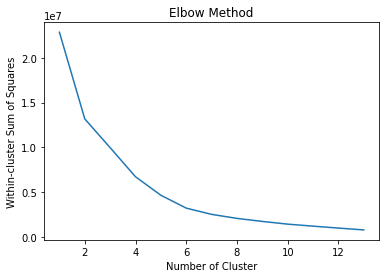

In [684]:
plt.plot(range(1, 14), sum_of_sq[1:14]);
plt.title("Elbow Method") 
plt.xlabel("Number of Cluster") 
plt.ylabel("Within-cluster Sum of Squares")

In [685]:
pd.DataFrame(sum_of_sq, columns = ['Difference in SS'], index = range(1,15)).diff()
# We optimally Chose 5 cluster

,Difference in SS
1,NaN
2,-1.655399e+07
3,-9.685497e+06
4,-3.210637e+06
5,-3.251787e+06
6,-2.067036e+06
7,-1.438786e+06
8,-6.967727e+05
9,-4.499074e+05
10,-3.405300e+05


In [686]:
gmm = GaussianMixture(n_components = 5)
gmm.fit(X)

GaussianMixture(n_components=5)

In [687]:
#Predict for each company
clusters = gmm.predict(X)
clusters_df = pd.DataFrame({'Cluster':clusters,'Companies':transposed.columns})

In [688]:
clusters_df = clusters_df.sort_values(['Cluster']).reset_index(drop = True)
clusters_df.to_csv("clusters.csv")
clusters_df = pd.read_csv("clusters.csv", index_col = 0)

In [689]:
clusters_df

,Cluster,Companies
0,0,BAJAJ-AUTO.BO
1,1,BAJAJFINSV.BO
2,2,ASIANPAINT.BO
3,2,TECHM.BO
4,2,TCS.BO
5,2,SUNPHARMA.BO
6,2,SBIN.BO
7,2,RELIANCE.BO
8,2,POWERGRID.BO
9,2,ONGC.BO


In [690]:
train_data = all_data[:'2021-09-30']
# Training Data is till 30st November
test_data = all_data['2021-10-01':'2021-12-31']

In [691]:
Y_train = train_data['Target_Direction']
X_train = train_data[['Open', 'Close' , 'Low' , 'Close']]

In [692]:
from sklearn.model_selection import RandomizedSearchCV, validation_curve, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier

In [693]:
rf = RandomForestClassifier()

In [735]:
train_scoreNum, test_scoreNum = validation_curve(rf,
                                X = X_train, y = Y_train.values.ravel(), 
                                param_name = 'n_estimators', 
                                param_range = [2,3,5,10,12,15,20,25,30], cv = TimeSeriesSplit(n_splits = 5))

In [736]:
train_scores_mean = np.mean(train_scoreNum, axis=1)
train_scores_std = np.std(train_scoreNum, axis=1)
test_scores_mean = np.mean(test_scoreNum, axis=1)
test_scores_std = np.std(test_scoreNum, axis=1)

Text(0.5, 1.0, 'Validation Curve Score for n_estimators')

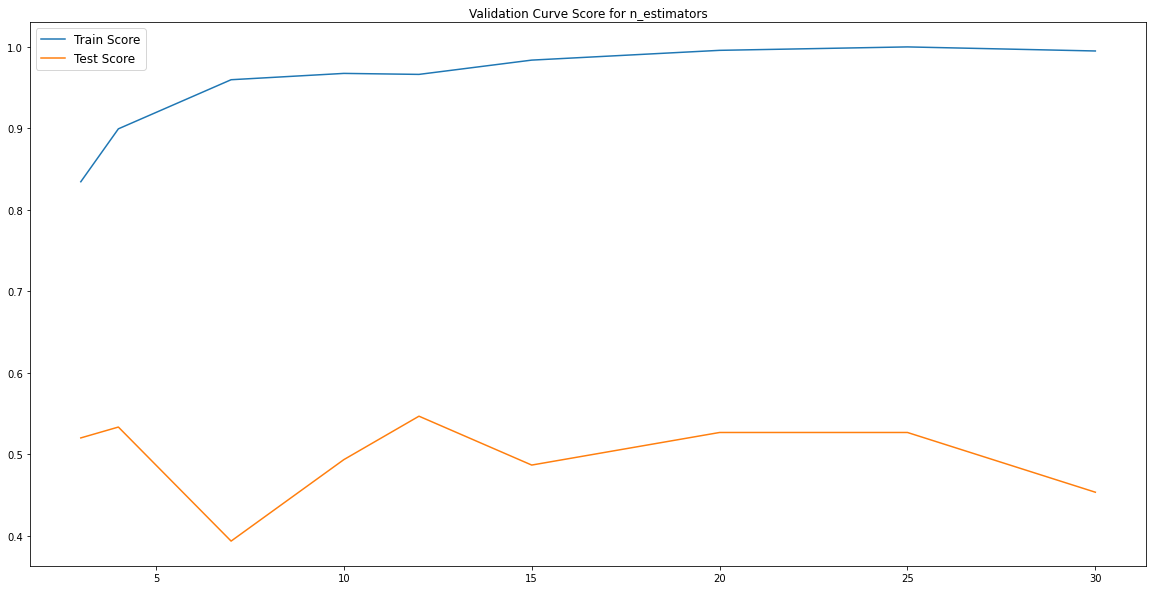

In [737]:
plt.figure(figsize = (20,10))
plt.plot([3,4,7,10,12,15,20,25,30],train_scores_mean)
plt.plot([3,4,7,10,12,15,20,25,30],test_scores_mean)
plt.legend(['Train Score','Test Score'], fontsize = 'large')
plt.title('Validation Curve Score for n_estimators', fontsize = 'large')

In [738]:
import pickle
import os
from sklearn.model_selection import GridSearchCV

In [739]:
all_data['Target_Direction']

Date
2021-01-01    1
2021-01-04    0
2021-01-05    0
2021-01-06    0
2021-01-07    0
             ..
2021-11-30    0
2021-12-01    1
2021-12-02    1
2021-12-03    1
2021-12-06    1
Name: Target_Direction, Length: 6870, dtype: int64

In [740]:
#Run the loop for every unique cluster - 5 loops

for cluster_selected in clusters_df.Cluster.unique():
    print(f'The current cluster running is : {cluster_selected}')
    co_data = all_data[all_data.Symbol.isin(clusters_df.loc[clusters_df.Cluster==cluster_selected,'Companies'].tolist())].copy()
    co_train = co_data[:'2021-09-30']
    X_train = co_train[['Open' , 'Close' , 'High' , 'Low']]
    Y_train = co_train.loc[:,['Target_Direction']]
    
        #Define paramters from Validation Curve
    params = {'max_depth': [5, 7],
          'max_features': ['sqrt'],
          'min_samples_leaf': [10, 15, 20],
          'n_estimators': [5, 7, 9],
         'min_samples_split':[20, 25, 30]} #Using Validation Curves
    
    rf = RandomForestClassifier()
    time_series_split = TimeSeriesSplit(n_splits = 4)
    rf_cv = GridSearchCV(rf, params, cv = time_series_split, n_jobs = -1, verbose = 20)
    rf_cv.fit(X_train, Y_train.values.ravel())
    
    file_loc = f'{os.getcwd()}\\Pickle_Files\\Cluster_{cluster_selected}'    
    pickle.dump(rf_cv, open(file_loc,'wb'))

The current cluster running is : 0
Fitting 4 folds for each of 54 candidates, totalling 216 fits
The current cluster running is : 1
Fitting 4 folds for each of 54 candidates, totalling 216 fits
The current cluster running is : 2
Fitting 4 folds for each of 54 candidates, totalling 216 fits
The current cluster running is : 3
Fitting 4 folds for each of 54 candidates, totalling 216 fits
The current cluster running is : 4
Fitting 4 folds for each of 54 candidates, totalling 216 fits


In [741]:
day_data = all_data.loc['2021-11-01 00:00:00']
#Prediction For 1st November

In [742]:
pred_for_tomorrow = pd.DataFrame({'Date':[],
                                  'company':[],
                                  'prediction':[]})

In [743]:
#Predict each stock using 
pred = pd.DataFrame()
for cluster_selected in clusters_df.Cluster.unique():
    rf_cv =  pickle.load(open(os.getcwd() + f'\\Pickle_Files\\Cluster_{cluster_selected}', 'rb'))
    best_rf = rf_cv.best_estimator_
    cluster_data = day_data.loc[day_data.Symbol.isin(clusters_df.loc[clusters_df.Cluster==cluster_selected,'Companies'].tolist())].copy()
    cluster_data = cluster_data.dropna()
    cluster_data
    if (cluster_data.shape[0]>0):
        X_test = cluster_data.loc[:,['Open' , 'Close' , 'High' , 'Low']]
        prediction_One_Stock = pd.DataFrame({'Date':cluster_data.index,'company':cluster_data['Symbol'],'prediction':best_rf.predict_proba(X_test)[:,1]})
        pred = pd.concat([pred , prediction_One_Stock] , axis =0)

In [744]:
top_10_pred = pred.sort_values('prediction' , ascending = False).head(10)
top_10_pred

,Date,company,prediction
Date,,,
2021-11-01,2021-11-01,HCLTECH.BO,0.675220
2021-11-01,2021-11-01,INDUSINDBK.BO,0.675220
2021-11-01,2021-11-01,BAJAJ-AUTO.BO,0.634082
2021-11-01,2021-11-01,INFY.BO,0.603333
2021-11-01,2021-11-01,HDFCBANK.BO,0.603333
2021-11-01,2021-11-01,BAJFINANCE.BO,0.591539
2021-11-01,2021-11-01,NTPC.BO,0.564725
2021-11-01,2021-11-01,ONGC.BO,0.564725
2021-11-01,2021-11-01,AXISBANK.BO,0.553188


In [745]:
for selected_company in top_10_pred['company']:
    actual = all_data[all_data.Symbol == selected_company].loc['2021-11-01','Target_Direction']
    pct_change = all_data[all_data.Symbol == selected_company].loc['2021-11-01','Target']
    openData = all_data[all_data.Symbol == selected_company].loc['2021-11-01','Open']
    CloseData = all_data[all_data.Symbol == selected_company].loc['2021-11-01','Close_Shifted']
    top_10_pred.loc[top_10_pred.company == selected_company,'actual'] = actual
    top_10_pred.loc[top_10_pred.company == selected_company,'pct_change'] = pct_change
    top_10_pred.loc[top_10_pred.company == selected_company,'Open'] = openData
    top_10_pred.loc[top_10_pred.company == selected_company,'Close After 5 days'] = CloseData

In [746]:
all_data.head(10)

,Open,High,Low,Close,Adj Close,Volume,Symbol,Close_Shifted,Target,Target_Direction,Returns
Date,,,,,,,,,,,
2021-01-01,2768.000000,2790.800049,2750.949951,2775.000000,2758.075439,52072,ASIANPAINT.BO,2844.000000,2.327254,1,7.000000
2021-01-04,2784.399902,2790.000000,2745.199951,2754.800049,2737.998535,45644,ASIANPAINT.BO,2849.199951,-0.249617,0,-29.599854
2021-01-05,2744.149902,2802.949951,2732.199951,2793.250000,2776.214111,74761,ASIANPAINT.BO,2737.300049,-3.445198,0,49.100098
2021-01-06,2801.000000,2822.000000,2780.000000,2803.149902,2786.053711,43364,ASIANPAINT.BO,2704.500000,-4.942898,0,2.149902
2021-01-07,2802.000000,2831.399902,2782.250000,2791.350098,2774.325928,835859,ASIANPAINT.BO,2663.500000,-8.156028,0,-10.649902
2021-01-08,2820.000000,2849.149902,2790.000000,2844.000000,2826.654541,33667,ASIANPAINT.BO,2590.000000,-8.836266,0,24.000000
2021-01-11,2840.000000,2871.399902,2825.149902,2849.199951,2831.822754,48647,ASIANPAINT.BO,2589.050049,-6.845067,0,9.199951
2021-01-12,2840.000000,2847.250000,2724.000000,2737.300049,2720.605469,180912,ASIANPAINT.BO,2645.600098,-2.497293,0,-102.699951
2021-01-13,2767.000000,2767.000000,2678.300049,2704.500000,2688.005371,117140,ASIANPAINT.BO,2697.899902,0.375297,1,-62.500000


In [748]:
TotalChange = top_10_pred['Open'].sum() - top_10_pred['Close After 5 days'].sum()

In [749]:
TotalChange

-299.85009765625